<a href="https://colab.research.google.com/github/sklow/google-colaboratory/blob/main/cuda_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib numpy

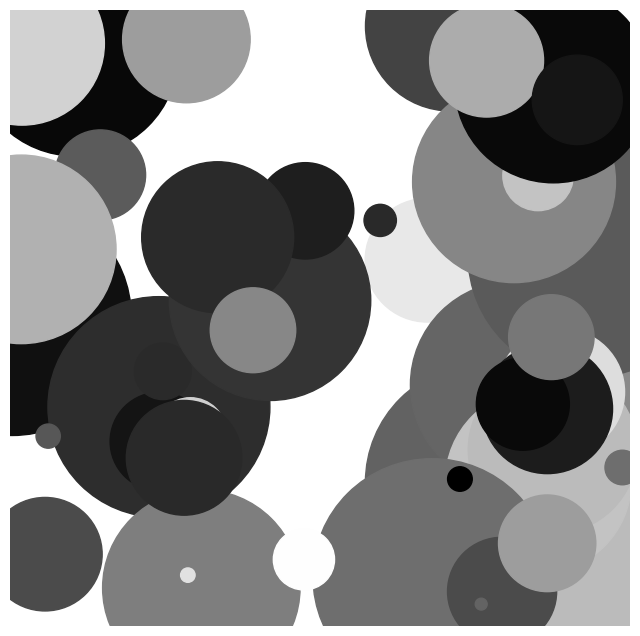

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 画像のサイズを設定
plt.figure(figsize=(8, 8))

# 背景を黒に設定
plt.gca().set_facecolor('black')

# ランダムな位置に円を描画
for _ in range(50):
    # 円の中心座標をランダムに生成
    x, y = np.random.rand(2)
    # 円の半径をランダムに生成
    radius = np.random.rand() * 0.2
    # 円の色の濃さをランダムに生成
    color_intensity = np.random.rand()
    # 円を描画（塗りつぶし）
    circle = plt.Circle((x, y), radius, color=(color_intensity, color_intensity, color_intensity), fill=True)
    plt.gca().add_artist(circle)

# 軸の表示をオフにする
plt.axis('off')

# 画像を保存
plt.savefig('image.png', bbox_inches='tight', pad_inches=0, dpi=300)

# 画像を表示 (オプション)
plt.show()


In [6]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin
!git clone https://github.com/NVIDIA/cuda-samples/
!cp -r cuda-samples/Common/* /usr/local/include

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-omnrl_7q
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-omnrl_7q
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 0a71d56e5dce3ff1f0dd2c47c29367629262f527
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4293 sha256=582c628be276fb19ebd8002b358253c44509eae9dc3d6b47f9f1531dbda63921
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dd6ws87/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out
Cloning into 'cuda-samples'...
remote: Enumerating objects: 17263, done.
remote: Counting objects: 100% (3243/3243), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 17263 (delta 2922), reused 3120 (delta 2882), pack-re

In [8]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [15]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 324164, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 324164 (delta 39), reused 72 (delta 20), pack-reused 324043
Receiving objects: 100% (324164/324164), 511.41 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (225862/225862), done.
Updating files: 100% (7251/7251), done.


In [21]:
!mkdir opencv/build
!cd opencv/build && cmake ..

-- 'Release' build type is used by default. Use CMAKE_BUILD_TYPE to specify build type (Release or Debug)
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detected processor: x86_64
CMake Warning (dev) at cmake/OpenCVUtils.cmake:144 (find_package):
  Policy CMP0148 is not set: The FindPythonInterp and FindPythonLibs modules
  are removed.  Run "cmake --help-policy CMP0148" for policy details.  Use
  the cmake_policy command to set the policy and suppress this warning.

Call Stack (most recent call first):
  cmake/OpenCVDetectPython.cma

In [ ]:
!cd opencv/build && make && make install

[  0%] Built target opencv_dnn_plugins
[  0%] Built target opencv_highgui_plugins
[  0%] Built target opencv_videoio_plugins
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/ittnotify_static.c.o
[  0%] Building C object 3rdparty/ittnotify/CMakeFiles/ittnotify.dir/src/ittnotify/jitprofiling.c.o
[  0%] Linking C static library ../lib/libittnotify.a
[  0%] Built target ittnotify
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_core.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_all.c.o
[  0%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_color_convert_rgbs.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_filter_bilateral.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippiw.dir/src/iw_image_filter_box.c.o
[  1%] Building C object 3rdparty/ippiw/CMakeFiles/ippi

In [7]:
%%cu

#include <npp.h>
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp>

int main()
{
    NppStatus nppStatus;

    // Parameters for adaptive thresholding
    int windowSize = 9; // Window size for local thresholding
    float delta = 10.0f; // Delta value used in threshold calculation

    // Load image using OpenCV
    cv::Mat img = cv::imread("image.png", cv::IMREAD_GRAYSCALE);
    if (img.empty())
    {
        std::cerr << "Error: Unable to open input image." << std::endl;
        return -1;
    }

    int width = img.cols;
    int height = img.rows;

    NppiSize oSizeROI = {width, height}; // Region of interest

    // Allocate memory for source and destination images on the device
    Npp8u *pSrc, *pDst;
    int nSrcStep = img.step; // Step size of the source image
    int nDstStep = nSrcStep; // Assuming destination step size is the same

    cudaMalloc((void **)&pSrc, nSrcStep * height);
    cudaMalloc((void **)&pDst, nDstStep * height);

    // Copy data from host to device
    cudaMemcpy(pSrc, img.data, nSrcStep * height, cudaMemcpyHostToDevice);

    // Set adaptive thresholding parameters
    NppiSize oMaskSize = {windowSize, windowSize};
    NppiPoint oAnchor = {windowSize / 2, windowSize / 2};

    // Apply adaptive thresholding
    nppStatus = nppiFilterThresholdAdaptiveBoxBorder_8u_C1R_Ctx(pSrc, nSrcStep, pDst, nDstStep, oSizeROI, oMaskSize, oAnchor, NPP_CMP_GREATER, delta, NPP_BORDER_REPLICATE);

    if (nppStatus != NPP_SUCCESS)
    {
        std::cerr << "Error: NPP operation failed." << std::endl;
        cudaFree(pSrc);
        cudaFree(pDst);
        return -1;
    }

    // Copy results back to host
    cv::Mat result(height, width, CV_8UC1);
    cudaMemcpy(result.data, pDst, nDstStep * height, cudaMemcpyDeviceToHost);

    // Save the result
    cv::imwrite("output.png", result);

    // Free device memory
    cudaFree(pSrc);
    cudaFree(pDst);

    return 0;
}


/tmp/tmph_2db4lj/a7e2b9e1-112d-4f0d-8851-5138439e1241.cu:4:10: fatal error: opencv2/opencv.hpp: No such file or directory
    4 | #include <opencv2/opencv.hpp>
      |          ^~~~~~~~~~~~~~~~~~~~
compilation terminated.

